# Musings on Entropy and Information Theory


Author: Felipe Buchbinder


Date: 10-10-2019

##### Note:
I like to learn by teaching myself. Thinking about how I would teach something helps me think about the most basic and fundamental ideas which underlie the topic I'm studying. I made this notebook for my own study.  I'm sharing it, but I don't intend it to be perfect nor absolutely rigorous. It's just the way *I* found it easier to understand these concepts. I enjoyed it. I hope you enjoy it too! :)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Information of an event

Information, like comedy, is all about surprise. \
\
If my mother tells me I'm handsome, it doesn't come as anything unexpected. It doesn't tell me much either. She always thinks I'm handsom (and mother's always right!)\
\
But if that gorgeous girl tells me I look really sexy right now, THAT_ is unexpected. It's also much more informative! It informs me I should stop writing these musings and go talk to the girl! 

It is highly probable that my mom would tell me I'm handsom. So, if this happens, it doesn't surprise me. Neither does it inform me anything about how handsom I really am. 

I'm sad to say, however, that it is very unlikely that a gorgeous girl will look me in the eye and call me the sexy protagonist of her wildest dreams. So if this does happen, I'm flabbergasted! It's also really informative: I do have a change with the girl after all

Hence,  the amount of surprise (and information) that I gain from observing an event is small if this event is likely to happen anyway, but huge, if this event is unlikely. Let's put it this way: The surprise of observing an event $x$ which happens with probability $p(x)$ is 

$$
S(x) \equiv \log_2 {\frac{1}{p(x)}}
$$

This surprise is a measure of how much information I gain by observing this event.

In [10]:
def log2(x):
    return(np.log(x)/np.log(2))

def information_of_event(p, digits = 2):
    return(round(log2(1.0/p),digits))

Every morning I wake up and I feel, deep in my heart, that with 99% probability, mom will think me handsom. So if it does happen, my surprise (and the information that gives me) is only

In [11]:
information_of_event(.99)

0.01

But a gorgeous girl calling me sexy is something whose probability of happening is 1 in 10,000. So if it does happen, my surprise (and the information that gives me) is

In [12]:
information_of_event(0.0001)

13.29

Much higher! 

So now, Mom, you know why I never listen to you.

## A loving family of four

Probability, surprise, information, and learning are 4 members of a loving family \
\
If an event has high probability, it doesn't surprise me much when it happens and it brings no information either. I learn nothing new I didn't know before\
\
If, however, an event which has small probability happens, it comes as a surprise and it is very informative. I learn something new! I update my beliefs! My priors! 

Think of the classic Black Swan example. How surprising it must have been to see a black swan for the first time! How informative! Not all swans are white after all! We've learned something we didn't know before.

## Entropy

We all have that friend who's insanely fun. You never know what to expect of him. So we know whenever we go out with him, we're in for a good time! Why is that?

Well, suppose this friend is a random variable, and whatever he does are his events. Since we don't know what to expect of him, our expected value of surprise is high. And that's fun!

Now, we all have that colleague at work who is just boring! Nothing new. Nothing different. He's so predictable! If he were a random variable, hist expected value of surprise would be really low.

A random variable has events, and each event may surprise us, more or less. The greater our uncertainty on which event will actually happen, the greater the expected value of our surprise. This expected value has a name: Entropy.

The Entropy of a random variable $X$ is the expected value of how much it will surprise us when an event actually happens. In other words, **the entropy is the expected value of information we will gain by observing $X$**. Mathematically,

$$
H(X) \equiv \mathbb{E}_p S(X) = \mathbb{E}_p \left[\log_2 \frac{1}{p(x_i)}\right]
$$

If $X$ is a discrete random variable, then

$$
H(X) = \sum_{i=1}^{N} p(x_i) \log_2 \frac{1}{p(x_i)}
$$

It is also useful to think of entropy in terms of **uncertainty**. The more uncertain we are about the results of a random variable, the more information we expect to obtain from observing it.

In [13]:
def entropy(list_of_probabilities, digits = 2):

    assert all(p >= 0 for p in list_of_probabilities), "All probabilities must be non-negative"
    assert all(p <= 1 for p in list_of_probabilities), "Probabilities cannot be greater than 1"
    assert sum(list_of_probabilities) == 1, "Probabilities should add 1"
    
    entropy = 0.0
    for p in list_of_probabilities:
        if p > 0:
            entropy += p * information_of_event(p)
        elif p == 0:
            #If p = 0, we make 0 * log(1/0) = 0.
            #We can show this makes sense using L'Hopital's theorem,
            #but we will not discuss it here.
            entropy += 0
        else:
            raise ValueError("Invalid list of probabilities")
    return round(entropy, digits)

# Limiting cases

Are there maximum and minimum values for a variable's entropy? 

Let's begin by discussing whether there is a minimum value. If the entropy measures the average surprise we have by observing a random variable, a minimum value for entropy happens when we have no surprise at all. This happens when $X$ is a constant. There's no doubt about the value of 5. It's 5. It's 5 with probability 1. If we calculate its entropy, we get

$$
H(5) = 1 \cdot \log_2 {1} = 0
$$

No uncertainty exists.

So entropy has a minimum value, and it is zero.

What about a maximum value for entropy? To ask whether there is a maximum value for the entropy is to ask whether there is a scenario when our uncertainty is the highest possible. And there is such a scenario.

Our uncertainty is highest in a uniform distribution. After all, when everything has the same probability of happening, there's really no way of guessing what will actually happen. In this scenario, $p(x_i) = \frac{1}{n} \forall i$. This yields as a maximum possible value for an entropy, which is

$$
H_\max(X) = \log_2 n
$$

If I were the guy begind of this (i.e., if I were Shannon), I would have divided $H(X)$ by $\log_2 n$, to make $H(X)$ be defined in the $[0,1]$ interval. But I'm not Shannon. So $H(X)$ is actually defined in the interval $[0, \log_2 n]$. How can such a smart guy like Shannon make such bad choices in life?

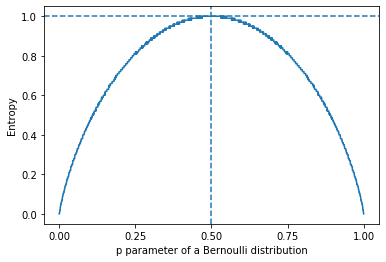

In [34]:
# Let's simulate how the entropy changes for a Bernoulli random variable.
#When p = 0 or 1, the variable is a constant and the entropy is zero.
#When p = 0.5, the variable follows a uniform distribution and the entropy is maximum.

N = 10000
p = [x/N for x in range(N)]
H = list()
for i in range(len(p)):
    pi = p[i]
    H.append(entropy([pi, 1-pi]))
    
plt.plot(p,H)
plt.xlabel("p parameter of a Bernoulli distribution")
plt.ylabel("Entropy")
plt.xticks([0,0.25,0.5,0.75,1])
plt.axvline(0.5, linestyle = '--')
plt.axhline(1, linestyle = '--')
plt.show()

In [15]:
#In a Bernoulli variable, X can assume only two values, so n = 2.
#As we antecipated, the maximum value of the entropy is equal to log_2(2):

print("The maximum value of the entropy was {:.2f}".format(max(H)))
print("The predicted maximum value for the entropy was the logarithm of 2 in base 2, which equals {:.2f}".format(log2(2)))

The maximum value of the entropy was 1.00
The predicted maximum value for the entropy was the logarithm of 2 in base 2, which equals 1.00


## What if I'm wrong (or: not all p's are created equal)

Remember the girl? Of course you do! Some people are just unforgetable...

She had a 1/10,000 chance of calling me sexy and a 9,999/10,000 chance of walking straight by me without even bothering to say hello. So I'm pretty sure of what will happen, and my uncertainty is small:

In [16]:
entropy([1.0/10000,9999.0/10000], digits = 5)

0.00133

But maybe I was wrong in believing that it was so unlikely for her to call me sexy. Maybe she loved me all along! How does that affect my entropy?

Well, my surprise doesn't change! But the probabilities with which we calculate the expected value do, because they depend on the probabilities of the event actually happening, not on what I believe these probabilities are.

So if I think that things happen with a probability function P, but they actually happen with a probability function Q, than the expected value of my surprise is actually

$$
H(X) = \mathbb{E}_Q \left[ \log_2 \frac{1}{p(x_i)}\right]
$$

If we're talking about a discrete random variable, this expression becomes

$$
H(X) = \sum_{i=1}^{N} q(x_i) \log_2 \frac{1}{p(x_i)}
$$

where $q(x_i)$ is the probability of the event $x_i$ "aqtually" happening, and $p(x_i)$ is what I "p-lieve" that probability to be.

This entropy is called **cross entropy**. 

A key idea here is that the p's in the traditional entropy formula $H(X) = \sum p \log_2 p$ do not mean the same thing. One is the probability of things actually happening and the other is the probability with which I believe each thing will happen. That's why the latter is related to "surprise" but the former is related to actual expected value. 

This same idea appears when we define conditional entropy. Conditional entropy is the uncertainty which remains of $X$ after observing $Y$. My surprise of any given event $X$ after observing $Y$ depends on the probability $p(X|Y)$. But the probability of $X$ and $Y$ actually assuming any specific values depend on the joint probability, $p(X,Y)$. So the conditional entropy of $X$ given $Y$ is

$$
H(X|Y) = \sum_{i=1}^{N} p(x_i,y_i) \log_2 \frac{1}{p(x_i|y_i)}
$$

Note that this is straightforward from the cross entropy formula, but not from the original entropy formula. This is because the original entropy formula is trecherous: it lures us into believing both p's mean the same thing. They don't.

#### Proposal of a new notation for cross entropy

Entropy is often represented as $H(p)$ and cross-entropy as $H(p,q)$. I find, however, that these representations are little informative, because they aren't clear as to what does $p$ and $q$ actually mean.

I'll propose a new notation for the cross-entropy: $H_Q^P(X)$, where the $Q$ *below* indicates the grounded, down-to-earth, true probability distribution which is used for the expected value calculation, and the $P$ *above* indicates the probability distribution which I have on my head, on my thoughts, on my imagination, and which is therefore used for the calculation of the surprise.

Under this notation, $H_P^P(X)$ is simply the good-old entropy of $X$. But it gains a clearer meaning: in this case, the probability I ascribe to $X$ (the $P$ above) is really the true probability (the $P$ below). This need not be the case, however, and the notation $H_Q^P(X)$ makes this quite clear.

## Mutual information


Learning is all about increasing information and reducing uncertainty. Stated otherwise, to learn is to reduce surprises. It may surprise you to know that Nicole had a baby. But you would have gotten less surprised if you had known that she was pregnant. 

So let's say we want to learn about a random variable $X$. Your expected surprise from $X$ is the entropy of $X$, which we'll call $H(X)$. 

But you observed another variable $Y$ which tells you something about $X$. For example, you saw her entering a bookstore and buying a book called "What to Expect When You're Expecting". Now your surprise from $X$ is the entropy of $X$ *given* $Y$, which we'll call $H(X|Y)$.

Learning is reducing surprises, so:

$$
H(X|Y) < H(X)
$$

The difference between these two terms is the *amount of information we gain about X by observing Y*. This has a name: **mutual information**. If we represent the mutual information of $X$ and $Y$ by $I(X,Y)$ then, by definition,

$$
I(X,Y) \equiv H(X) - H(X|Y)
$$

I like to rewrite this as $H(X|Y) = H(X) - I(X,Y)$, which enables me to think like this: the uncertainty that remains about $X$ after having seen $Y$ is the uncertainty I had about $X$ before seeing $Y$ *minus* what I've learned about $X$ from seeing $Y$.

If $X$ and $Y$ happen to be independent, one variable tells us nothing about the other and, therefore, $I(X,Y)$ should be zero. Indeed, if we learn norhing from $X$ by observing $Y$, $H(X|Y)=H(X)$, which implies $I(X,Y)=0$


## Kullback-Leibler divergence (Relative Entropy)

The Kullback-Leibler divergence between two distributions is defined by

$$
D(P||Q) = \sum_{i=1}^{N} p(x_i) \log_2 \left( \frac{p(x_i)}{q(x_i)} \right) 
$$

It is reportedly a measure of the distance between the distributions. But it's a wacky distance, because the distance from P to Q is not the same as the distance from Q to P! So there must be a better way of understanding what this is.

Let's do some maths to make things easier to grasp. A warning, first! This is my own invention, so I may be wrong. Proceed at your own peril. 

Rewrite $\log_2 \left( \frac{p(x_i)}{q(x_i)} \right)$ as $\log_2 p(x_i) - \log_2 q(x_i)$ and, subsequently, as $\log_2 \left( \frac{1}{q(x_i)} \right) - \log_2 \left( \frac{1}{p(x_i)} \right)$. Now, plug it back at the original formula for the Kulbak-Leibler divergence. With some rearranging, we get:

$$
D(P||Q) = \left[ \sum_{i=1}^{N} p(x_i) \log_2 \frac{1}{q(x_i)} \right] - \left[ \sum_{i=1}^{N} p(x_i) \log_2 \frac{1}{p(x_i)} \right] 
$$

We now recognize two terms which are similar to the entropy and cross-entropy formulas we've seen so far. Using our notation for cross-entropy, we may write:

$$
D(P||Q) = H_P^Q(X) - H_P^P(X)
$$

Now think of entropy as a measure of my surprise from observing $X$. The second entropy measures how surprised I am when I am *right* about the true probability distribution of $X$. The first entropy measures how surprised I am when I am *wrong* about the true probability distribution of $X$ and believe it to be $Q$, rather than $P$.

If we think not in terms of surprise, but in terms of information, $H_P^P(X)$ is the (expected) amount of information to be gained by observing $X$ when I am *right* about its probability distribution. Conversely, $H_P^Q(X)$ is the (expected) amount of information to be gained by observing $X$ when I am *wrong* about its probability distribution, and believe it to be $Q$ rather than $P$. **The difference between these two represents a loss in the amount of information to be gained by observing X. This loss is the Kullback-Leibler divergence.**

In other words, **the Kullback-Leibler divergence measures how much (expected) information I loose by being wrong about the actual distribution of $X$, and believing it to be $Q$ rather than $P$**.

It follows that $D(P||Q)$ is always positive, as one can never gain more information by being wrong. In mathematical terms,

$$
D(P||Q) \geq 0
$$

## Mutual Information (again)

Supose $X$ and $Y$ are random variables and I use $Y$ to learn about $X$. How much information is there in $Y$ about $X$? The answer lies somewher whithin the joint probability distribution of these two variables, $p(X,Y)$. 

If $p(x,y)$ is equal to $p(x)\cdot p(y)$, and $Y$ has no information about $X$.

So I expect that if $p(x,y)$ is close to $p(x)\cdot p(y)$, then $Y$ should have little information about $X$, whereas if $p(x,y)$ is very different from $p(x)\cdot p(y)$, then $Y$ should have lots of information about $X$. 

Therefore, the distance between $p(x,y)$ and $p(x) \cdot p(y)$ is a measure of how much information $Y$ carries about $X$.

To put it technically, 

$$
I(X,Y) = D(p(x,y) || p(x)\cdot p(y))
$$

If we recall our explanation of the Kullback-Leibler divergence, we can easily understand why this is the case: **If we mistakenly considered the joint probability of $X$ and $Y$ to be $p(x) \cdot p(y)$ rather than $p(x,y)$, we would loose all the information $Y$ carries about $X$.** 

This is because I would be treating them as independent, when they're not. If, however, they trully are independent, then $p(x,y)=p(x)\cdot p(y)$ and $I(X,Y) = D(p(x)\cdot p(y) || p(x)\cdot p(y)) = 0$, as expected. 

## Joint entropy

We can also calculate the entropy for a two-dimensional random variable. It follows exactly the same logic, except that now, it's probability function is $p(x,y)$, rather than $p(x)$. This being said, its entropy is just what you'ld expect:

$$
H(X,Y) = \sum p(x,y) \log_2 \frac{1}{p(x,y)}
$$

This is called the *joint entropy* of $X$ and $Y$. It is a fairly simple formula but it makes calculating conditional entropy much simpler.

Think about it this way. We have a bidimensional random variable, $(X,Y)$. Our uncertainty about it is $H(X,Y)$. But then we learn the value of $Y$. There's no longer uncertainty on $Y$! Our uncertainty has reduced! By how much? By the uncertainty of $Y$, which is $H(Y)$. The uncertainty which remains is $H(X,Y) - H(Y)$. This is the uncertainty of $X$ *given* the value of $Y$, that is, $H(X|Y)$. It follows that

$$
H(X|Y) = H(X,Y) - H(Y)
$$

We can read this like this: **the uncertainty that remains of $X$ after knowing $Y$ is the total uncertainty of $X$ and $Y$ *minus* the uncertainty which we've removed by getting to know $Y$.**

This is a much easier way to calculate $H(X|Y)$ than the way we've previously seen. 

Now recall that $I(X,Y) = H(X) - H(X|Y)$ or, equivalently, $H(X|Y) = H(X) - I(X,Y)$. It follows that $H(X) - I(X,Y) = H(X,Y) - H(Y)$, which yields

$$
I(X,Y) = H(X) + H(Y) - H(X,Y)
$$

that is to say, the total uncertainty I get from considering $X$ and $Y$ independently is actually greater than if I consider $X$ and $Y$ conjointly, because when I consider them conjointly and account for the fact that the behavior of one variable restraints the behavior of the other variable, so this reduces a bit my uncertainty. This reduction is simply the information I get from one variable by observing the other, that is, the mutual information. 


This is not the first time we see mutual information between two variables being associated with the difference between considering separately of conjointly. We have seen this before, when we studied the Kullback-Leibler divergence and saw that

$$
I(X,Y) = D(p(x,y) || p(x)\cdot p(y))
$$

Beautiful, isn't it?